# Scope

Goal 1: Use a two-sample t-test, ANOVA and Tukey Range Test to determine if there is a significant change in my average running pace since March 20, 2022. The data will be imported from my Garmin account, which I use to track my runs. The results may help me determine the reason for my chronic fatigue since that time.

Goal 2: Use linear regression model to predict mile pace based on total distance and weather conditions.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import data
activities_all = pd.read_csv('Activities.csv')

## Data Inspection and Cleaning

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

#View first 5 rows of data
activities_all.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Avg Run Cadence.1,Max Run Cadence.1,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Avg. Swolf,Avg Stroke Rate,Total Reps,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2022-09-21 17:52:41,False,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:02.01.6,4,0.0,00:26:44,00:27:26,951,996
1,Running,2022-09-12 16:50:18,False,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:02.34.9,4,0.0,00:26:19,00:26:25,952,996
2,Running,2022-09-09 16:13:22,False,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:00.58.8,5,0.0,00:39:06,00:39:06,952,"1,027"
3,Running,2022-09-06 17:03:55,False,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,08:47.63.7,3,0.0,00:26:40,00:26:40,952,997
4,Running,2022-08-31 17:30:04,False,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0:00,0.0,0:00,No,00:01.69.5,4,0.0,00:26:04,00:26:38,952,996


In [4]:
activities_all.columns

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'Avg Run Cadence.1', 'Max Run Cadence.1',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow',
       'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp',
       'Surface Interval', 'Decompression', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Moving Time', 'Elapsed Time', 'Min Elevation',
       'Max Elevation'],
      dtype='object')

In [5]:
# Drop unnecessary columns
activities_all = activities_all[['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace','Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']]

In [6]:
# Rename columns
activities_all.columns = ['activity_type', 'date', 'title', 'distance', 'calories', 'time', 'avg_hr', 'max_hr', 'avg_cadence', 'max_cadence', 'avg_pace', 'best_pace', 'total_ascent', 'total_descent', 'avg_stride', 'moving_time', 'elapsed_time', 'min_elevation', 'max_elevation']

In [7]:
activities_all.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation
0,Running,2022-09-21 17:52:41,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,00:26:44,00:27:26,951,996
1,Running,2022-09-12 16:50:18,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,00:26:19,00:26:25,952,996
2,Running,2022-09-09 16:13:22,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,00:39:06,00:39:06,952,"1,027"
3,Running,2022-09-06 17:03:55,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,00:26:40,00:26:40,952,997
4,Running,2022-08-31 17:30:04,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,00:26:04,00:26:38,952,996


In [8]:
# Add weather data from Garmin Connect (no function to export with run data)
activities_all['temp'] = [75, 82, 88, 82, 84, 72, 88, 82, 79, 81, 90, 90, 88, 84, 75, 93, 93, 88, 88, 91, 99, 95, 90, 82, 79, 82, 82, 64, 70, 79, 79, 88, 63, 73, 59, 79, 55, 66, 61, 55, 54, 73, 55, 43, 81, 63, 63, 50, 54, 64, 21, 52, 43, 52, 55, 63, 66, 54, 66, 64, 70, 46, 50, 66, 68, 72, 73, 66, 82, 73, 72, 79, 90, 77, 73, 73, 84, 82, 84, 88, 86, 84, 72, 93, 81, 82, 95, 90, 86, 84, 82, 77, 91, 86, 86, 73, 86, 79, 84, 93, 88, 72, 73, 72, 70, 63, 61, 63, 70, 54, 57, 61, 75, 61, 61, 48, 73, 70, 55, 70, 52, 68, 61, 57, 37, 50, 46, 48, 37, 45, 36, 64, 57, 37, 43, 54, 50, 39, 55, 63, 48, 72, 75, 66, 63, 46, 46, 79, 81, 63, 73, 66, 79, 79, 84, 93, 82, 84, 88, 84, 81, 73, 81, 93, 82, 81, 90, 91, 88, 84, 88, 90, 88, 68, 66, 48, 57, 63, 77, 64, 70, 54, 48, 77, 72, 68, 64, 48, 48, 66, 55, 57, 54, 43, 57, 41, 36, 43, 64, 30, 55, 45, 34, 25, 41, 36, 57, 64, 61, 39, 63, 55, 37, 55, 59, 57, 72, 64, 72, 68, 61, 84, 79, 75, 77, 82, 82, 66, 81, 82, 66, 81, 84, 72, 86, 84, 72, 79, 82, 88, 64, 84, 79, 81, 77, 82, 73, 88, 82, 90, 73, 70, 90, 90, 81, 91, 84, 79, 73, 79, 75, 81, 77, 79, 88, 84, 68, 82, 48, 63, 61, 63, 77, 73, 75, 64, 55, 54, 57, 52, 54, 43, 36, 43, 28, 37, 30, 32, 28, 37, 50, 50, 45, 28, 59, 45, 34, 45, 55, 70, 55, 61, 70, 61, 64, 61, 45, 48, 'NaN', 82, 88, 77, 72, 86, 79, 79, 81, 90, 75, 81, 82, 88, 77, 95, 75, 79, 88, 91, 88, 84, 81, 95, 99, 93, 93, 84, 93, 84, 72, 81, 84, 86, 90, 88, 81, 88, 91, 84, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 84, 73, 81, 81, 84, 84, 61, 81, 81, 73, 75, 63, 66, 50, 61, 46, 43, 55, 45, 61, 54, 64, 52, 61, 54, 59, 61, 50, 46, 36, 48, 30, 39, 41, 45, 45, 70, 57, 66, 52, 50, 45, 52, 48, 48, 64, 68, 63, 77, 'NaN', 'NaN', 73, 75, 64, 72, 86, 79, 82, 79, 81, 81, 79, 77, 84, 84, 79, 77, 75, 86, 73, 77, 84, 88, 'NaN', 90, 86, 95, 91, 'NaN', 81, 81, 81, 90, 79, 90, 81, 86, 88, 81, 82, 82, 84, 75, 66, 82, 72, 72, 82, 64, 57, 54, 77, 72, 63, 64, 54, 'NaN', 'NaN', 'NaN', 'NaN', 59, 55, 63, 72, 50, 70, 43, 48, 45, 55, 39, 48, 46, 36, 27, 25, 43, 48, 52, 66, 55, 68, 73, 72, 75, 75, 68, 'NaN', 'NaN', 'NaN', 'NaN']
activities_all['humidity'] = [69, 30, 36, 55, 40, 78, 43, 48, 65, 51, 46, 34, 43, 62, 74, 36, 28, 63, 43, 34, 40, 44, 59, 58, 48, 58, 58, 88, 60, 39, 61, 55, 68, 36, 39, 54, 28, 37, 36, 33, 32, 33, 62, 39, 16, 20, 59, 25, 26, 18, 32, 30, 49, 50, 38, 68, 56, 22, 68, 56, 46, 46, 76, 46, 43, 38, 41, 49, 48, 61, 65, 70, 30, 41, 29, 36, 52, 27, 55, 59, 59, 55, 55, 50, 37, 42, 47, 41, 40, 45, 66, 61, 53, 46, 38, 94, 55, 28, 55, 28, 55, 61, 73, 83, 49, 27, 45, 27, 60, 47, 36, 31, 47, 59, 55, 87, 41, 26, 33, 18, 28, 23, 29, 41, 65, 58, 46, 46, 56, 66, 51, 28, 24, 41, 75, 41, 32, 35, 35, 29, 32, 57, 31, 32, 42, 66, 53, 51, 37, 36, 27, 40, 48, 48, 62, 41, 42, 40, 55, 66, 79, 44, 74, 47, 62, 70, 43, 49, 55, 37, 43, 41, 63, 68, 83, 50, 36, 48, 47, 42, 46, 32, 27, 57, 38, 28, 83, 87, 71, 46, 16, 36, 41, 42, 67, 45, 55, 70, 37, 64, 33, 53, 69, 80, 48, 55, 41, 64, 39, 41, 52, 38, 93, 58, 31, 44, 38, 37, 43, 40, 72, 66, 54, 74, 47, 45, 37, 88, 62, 70, 100, 70, 43, 94, 59, 62, 83, 74, 55, 36, 88, 45, 45, 45, 83, 58, 89, 46, 55, 52, 89, 94, 52, 52, 79, 53, 52, 45, 78, 70, 65, 62, 65, 23, 36, 55, 68, 55, 93, 83, 72, 72, 54, 41, 39, 68, 38, 67, 41, 35, 44, 81, 69, 56, 74, 52, 69, 80, 100, 44, 34, 46, 66, 74, 41, 57, 47, 57, 51, 40, 67, 39, 46, 77, 45, 39, 57, 87, 'NaN', 66, 52, 79, 83, 49, 54, 54, 74, 59, 69, 39, 48, 52, 69, 39, 54, 65, 33, 28, 46, 62, 84, 39, 33, 44, 50, 55, 56, 48, 73, 70, 52, 59, 49, 43, 42, 46, 41, 52, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 52, 61, 62, 70, 43, 29, 72, 62, 32, 25, 22, 25, 40, 40, 39, 66, 36, 38, 76, 55, 47, 18, 32, 31, 19, 23, 22, 34, 13, 35, 32, 43, 87, 56, 39, 24, 60, 36, 49, 50, 76, 57, 71, 37, 27, 42, 40, 55, 39, 'NaN', 'NaN', 78, 41, 83, 41, 59, 51, 48, 51, 51, 42, 61, 94, 66, 62, 65, 65, 44, 46, 78, 57, 55, 55, 'NaN', 52, 62, 53, 53, 'NaN', 66, 70, 66, 52, 37, 41, 54, 66, 52, 32, 35, 45, 52, 44, 46, 51, 38, 73, 42, 42, 55, 54, 57, 53, 42, 30, 82, 'NaN', 'NaN', 'NaN', 'NaN', 77, 30, 36, 31, 29, 28, 61, 43, 33, 58, 81, 66, 53, 51, 42, 58, 81, 50, 50, 46, 47, 46, 65, 61, 65, 47, 73, 'NaN', 'NaN', 'NaN', 'NaN']
activities_all['wind'] = [21, 12, 7, 7, 5, 18, 5, 5, 12, 6, 12, 9, 5, 0, 8, 5, 6, 15, 7, 13, 15, 9, 18, 7, 15, 9, 20, 8, 16, 6, 10, 21, 6, 17, 13, 23, 18, 9, 13, 16, 20, 16, 8, 7, 12, 6, 7, 5, 17, 16, 12, 9, 9, 14, 14, 14, 20, 15, 10, 7, 3, 3, 0, 5, 12, 12, 7, 9, 10, 8, 8, 7, 9, 9, 9, 10, 10, 9, 9, 7, 9, 8, 0, 16, 7, 8, 5, 8, 5, 7, 7, 6, 14, 9, 6, 8, 15, 15, 6, 8, 6, 3, 12, 14, 10, 10, 5, 14, 13, 13, 13, 12, 23, 15, 13, 14, 22, 18, 5, 10, 10, 18, 17, 17, 5, 13, 10, 10, 7, 9, 3, 20, 14, 5, 12, 8, 14, 12, 12, 7, 10, 12, 15, 13, 7, 9, 7, 14, 6, 'NaN', 21, 12, 10, 9, 12, 13, 6, 17, 9, 6, 9, 6, 10, 12, 0, 14, 13, 12, 12, 7, 14, 12, 16, 9, 8, 6, 14, 12, 9, 12, 12, 7, 27, 14, 17, 12, 0, 7, 8, 6, 3, 6, 6, 8, 9, 8, 13, 15, 8, 15, 13, 8, 8, 7, 13, 5, 12, 22, 7, 12, 7, 'NaN', 10, 6, 17, 24, 16, 17, 13, 0, 7, 15, 8, 16, 7, 3, 7, 9, 12, 7, 16, 15, 10, 5, 9, 7, 7, 5, 13, 14, 5, 10, 7, 18, 12, 12, 0, 0, 14, 10, 0, 6, 8, 10, 8, 12, 10, 12, 13, 14, 12, 8, 15, 9, 10, 16, 9, 12, 0, 3, 15, 0, 16, 18, 14, 6, 12, 7, 18, 12, 6, 9, 6, 10, 13, 15, 13, 15, 13, 12, 17, 5, 12, 13, 16, 12, 5, 10, 8, 14, 8, 7, 7, 10, 8, 6, 6, 0, 'NaN', 14, 25, 15, 13, 5, 12, 6, 13, 17, 10, 6, 14, 12, 5, 12, 9, 9, 7, 5, 10, 9, 7, 8, 5, 9, 14, 8, 12, 14, 10, 6, 9, 0, 10, 6, 10, 13, 9, 12, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 10, 3, 10, 7, 10, 6, 0, 16, 28, 14, 13, 13, 10, 3, 16, 12, 12, 6, 12, 17, 'NaN', 21, 8, 3, 24, 20, 10, 7, 13, 13, 23, 3, 13, 7, 14, 12, 16, 12, 16, 8, 8, 12, 17, 20, 10, 5, 12, 0, 7, 'NaN', 'NaN', 10, 10, 3, 10, 13, 0, 9, 10, 13, 6, 13, 5, 8, 0, 7, 8, 3, 5, 5, 8, 9, 9, 'NaN', 8, 3, 15, 20, 'NaN', 17, 7, 10, 17, 15, 13, 9, 13, 17, 5, 8, 13, 14, 18, 13, 21, 6, 10, 16, 6, 22, 15, 16, 9, 7, 12, 12, 'NaN', 'NaN', 'NaN', 'NaN', 18, 24, 17, 5, 6, 18, 15, 5, 16, 20, 5, 12, 18, 5, 12, 5, 9, 9, 9, 9, 13, 13, 16, 18, 14, 8, 14, 'NaN', 'NaN', 'NaN', 'NaN']

In [9]:
activities_all.title.unique()

array(['Lenexa Running', 'Shawnee Running', 'Running',
       'Shawnee - Pre-Race Workout', 'Shawnee - Run Walk Run®',
       'Shawnee - Speed Repeats', 'Shawnee - Drill Workout',
       'Shawnee - Hill Repeats', 'Shawnee - Benchmark Run',
       'Shawnee - Progression Run', 'Shawnee - Goal Pace Run',
       'Shawnee - Easy Run', 'Shawnee - Stride Repeats',
       'Shawnee - Long Easy Run', 'Kansas City Running',
       'Shawnee - Running', 'Shawnee run', 'Imogene Running',
       'Shawnee Mission Running', 'Manson Running', 'Untitled'],
      dtype=object)

In [10]:
# Remove all non-standard run types to normalize running speed
activities_all = activities_all[activities_all.title.isin(['Lenexa Running', 'Shawnee Running', 'Running', 'Kansas City Running', 'Shawnee - Running', 'Shawnee run', 'Shawnee Mission Running', 'Manson Running', 'Untitled'])]

In [11]:
activities_all.distance.unique()

array([ 3.  ,  3.01,  4.  ,  5.  ,  4.02,  6.  ,  4.01,  3.7 ,  5.02,
        5.01,  3.03,  3.02,  3.09,  2.32,  5.08,  3.2 ,  6.01,  4.28,
        5.1 ,  7.01,  3.67,  8.01,  4.03,  7.  ,  5.06,  3.19,  3.66,
        5.22,  4.3 , 10.01,  6.68,  4.34,  9.  ,  9.01,  3.12,  4.46,
        3.47,  3.65,  3.51,  4.5 ,  4.57,  3.81,  5.03,  0.47,  1.38,
        0.84,  0.  ])

In [12]:
# Remove all rows where the distance is under 2 miles -- I don't usually run less than that, so it's most likely a glitch
activities_all = activities_all[activities_all.distance >= 2]

In [13]:
activities_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 489
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   activity_type  436 non-null    object 
 1   date           436 non-null    object 
 2   title          436 non-null    object 
 3   distance       436 non-null    float64
 4   calories       436 non-null    object 
 5   time           436 non-null    object 
 6   avg_hr         436 non-null    object 
 7   max_hr         436 non-null    object 
 8   avg_cadence    436 non-null    int64  
 9   max_cadence    436 non-null    int64  
 10  avg_pace       436 non-null    object 
 11  best_pace      436 non-null    object 
 12  total_ascent   436 non-null    object 
 13  total_descent  436 non-null    object 
 14  avg_stride     436 non-null    float64
 15  moving_time    436 non-null    object 
 16  elapsed_time   436 non-null    object 
 17  min_elevation  436 non-null    object 
 18  max_elevat

In [14]:
activities_all.describe(include = 'all')

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind
count,436,436,436,436.000000,436,436,436,436,436.000000,436.000000,436,436,436,436,436.000000,436,436,436,436,436.0,436.0,436.0
unique,1,433,8,NaN,243,372,33,27,NaN,NaN,110,133,107,106,NaN,318,384,34,48,43.0,74.0,24.0
top,Running,2018-05-25 17:05:59,Shawnee Running,NaN,295,00:54:20,164,186,NaN,NaN,9:02,7:22,96,124,NaN,00:00:00,00:00:00,780,905,84.0,55.0,12.0
freq,436,4,337,NaN,8,4,44,46,NaN,NaN,14,11,19,25,NaN,73,16,158,118,25.0,20.0,45.0
mean,NaN,NaN,NaN,4.175298,NaN,NaN,NaN,NaN,164.600917,184.004587,NaN,NaN,NaN,NaN,1.055413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.156106,NaN,NaN,NaN,NaN,18.360537,23.893153,NaN,NaN,NaN,NaN,0.156806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.320000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.010000,NaN,NaN,NaN,NaN,164.000000,179.000000,NaN,NaN,NaN,NaN,1.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,168.000000,183.000000,NaN,NaN,NaN,NaN,1.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.010000,NaN,NaN,NaN,NaN,170.000000,186.000000,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Remove entries with blank data and remove commas from numerical values
activities_all = activities_all[(activities_all.total_ascent != '--') & (activities_all.temp != 'NaN') & (activities_all.humidity != 'NaN') & (activities_all.wind != 'NaN') & (activities_all.moving_time != '00:00:00') ]
activities_all.max_elevation = activities_all.max_elevation.apply(lambda x: x.replace(',', ''))
activities_all = activities_all.reset_index(drop = True)

In [16]:
# Update data types
activities_all.distance = activities_all.distance.astype('float')

# Columns to change to int
int_list = ['calories', 'avg_hr', 'max_hr', 'avg_cadence', 'max_cadence', 'total_ascent', 'total_descent', 'min_elevation', 'max_elevation', 'temp', 'humidity', 'wind']

for column in int_list:
    activities_all[column] = activities_all[column].astype('int')


In [17]:
# Add year column
activities_all['year'] = activities_all.date.apply(lambda x: x[:4])

In [18]:
# Get just date from 'date' column
activities_all.date = pd.to_datetime(activities_all.date)
activities_all.date = activities_all.date.apply(lambda x: x.strftime('%Y-%m-%d'))

# Convert avg_pace to int type
activities_all['pace_str'] = activities_all.avg_pace.astype(str)
activities_all['pace_min'] = activities_all.pace_str.apply(lambda x: x[0:1] if len(x) == 4 else x[0:2]).astype('int')
activities_all['pace_sec'] = activities_all.pace_str.apply(lambda x: x[-2:]).astype('int')
activities_all['avg_pace_int'] = activities_all.pace_min + (activities_all.pace_sec / 60)


activities_all.head()

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind,year,pace_str,pace_min,pace_sec,avg_pace_int
0,Running,2022-09-21,Lenexa Running,3.00,274,00:26:48,161,173,167,172,8:55,8:24,81,102,1.08,00:26:44,00:27:26,951,996,75,69,21,2022,8:55,8,55,8.916667
1,Running,2022-09-12,Lenexa Running,3.01,281,00:26:21,166,179,168,174,8:46,8:16,60,65,1.09,00:26:19,00:26:25,952,996,82,30,12,2022,8:46,8,46,8.766667
2,Running,2022-09-09,Lenexa Running,4.00,417,00:39:06,166,181,156,179,9:46,8:17,149,144,1.06,00:39:06,00:39:06,952,1027,88,36,7,2022,9:46,9,46,9.766667
3,Running,2022-09-06,Lenexa Running,3.00,280,00:26:40,163,177,166,172,8:53,8:13,50,61,1.09,00:26:40,00:26:40,952,997,82,55,7,2022,8:53,8,53,8.883333
4,Running,2022-08-31,Lenexa Running,3.00,282,00:26:10,167,181,168,172,8:43,8:11,50,54,1.10,00:26:04,00:26:38,952,996,84,40,5,2022,8:43,8,43,8.716667


In [19]:
activities_all.describe(include = 'all', datetime_is_numeric = True)

,activity_type,date,title,distance,calories,time,avg_hr,max_hr,avg_cadence,max_cadence,avg_pace,best_pace,total_ascent,total_descent,avg_stride,moving_time,elapsed_time,min_elevation,max_elevation,temp,humidity,wind,year,pace_str,pace_min,pace_sec,avg_pace_int
count,358,358,358,358.000000,358.000000,358,358.000000,358.000000,358.000000,358.000000,358,358,358.000000,358.000000,358.000000,358,358,358.000000,358.000000,358.000000,358.000000,358.000000,358,358,358.000000,358.000000,358.000000
unique,1,358,5,NaN,NaN,313,NaN,NaN,NaN,NaN,105,117,NaN,NaN,NaN,312,333,NaN,NaN,NaN,NaN,NaN,6,105,NaN,NaN,NaN
top,Running,2022-09-21,Shawnee Running,NaN,NaN,00:26:32,NaN,NaN,NaN,NaN,8:46,7:22,NaN,NaN,NaN,00:36:21,00:40:24,NaN,NaN,NaN,NaN,NaN,2018,8:46,NaN,NaN,NaN
freq,358,1,293,NaN,NaN,3,NaN,NaN,NaN,NaN,13,10,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,87,13,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.179777,410.477654,NaN,162.187151,182.782123,166.706704,186.432961,NaN,NaN,109.527933,130.041899,1.074832,NaN,NaN,801.754190,922.860335,68.513966,49.667598,10.337989,NaN,NaN,8.466480,31.729050,8.995298
std,NaN,NaN,NaN,1.183189,124.254610,NaN,13.148203,14.333073,4.938899,13.164962,NaN,NaN,42.354355,39.695069,0.029169,NaN,NaN,65.968382,38.224496,16.676140,16.506636,4.960376,NaN,NaN,0.567805,17.649301,0.432664
min,NaN,NaN,NaN,2.320000,219.000000,NaN,0.000000,0.000000,147.000000,172.000000,NaN,NaN,42.000000,47.000000,0.980000,NaN,NaN,738.000000,853.000000,21.000000,13.000000,0.000000,NaN,NaN,7.000000,0.000000,7.983333
25%,NaN,NaN,NaN,3.010000,300.000000,NaN,160.250000,181.000000,164.000000,180.000000,NaN,NaN,94.000000,120.000000,1.050000,NaN,NaN,764.000000,905.000000,55.000000,38.000000,7.000000,NaN,NaN,8.000000,16.000000,8.687500
50%,NaN,NaN,NaN,4.000000,388.500000,NaN,164.000000,184.000000,168.000000,183.000000,NaN,NaN,106.000000,126.000000,1.070000,NaN,NaN,780.000000,906.000000,72.000000,48.000000,10.000000,NaN,NaN,8.000000,34.000000,8.916667
75%,NaN,NaN,NaN,5.010000,487.250000,NaN,166.000000,186.000000,170.000000,187.000000,NaN,NaN,119.750000,140.750000,1.090000,NaN,NaN,780.000000,909.000000,82.000000,61.000000,13.000000,NaN,NaN,9.000000,47.000000,9.200000


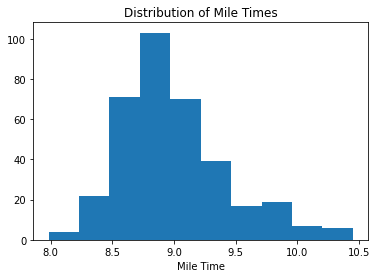

<Figure size 432x288 with 0 Axes>

In [20]:
# Check distribution of average pace values
plt.hist(activities_all.avg_pace_int)
plt.title('Distribution of Mile Times')
plt.xlabel('Mile Time')
plt.show()
plt.clf()

# Slightly right-skewed

# Analysis

## Goal 1: test for significant difference in average mile pace before and after March 20, 2022 (estimated onset of chronic fatigue)

Null Hypothesis: There is not a significant difference in my average mile pace before and after March 20, 2022. 
Alternative Hypothesis: There is a significant difference in my average mile pace before and after March 20, 2022.

Significance threshold: 0.05

Method: I will use data for runs between 3 and 4 miles in length to limit pace variation due to distance.
Divide data into different sets:

 1. Data after March 20, 2022
 2. All data before March 20, 2022
 3. Data from previous years for the same months as set 1 (March - September) (seasonal comparison)

In [21]:
# Get data for runs between 3 and 4 miles in length
activities_3_4 = activities_all[(activities_all.distance >= 3) & (activities_all.distance <= 4)]

In [22]:
# Get data for runs after March 20, 2022 (set 1)
activities_after = activities_3_4[activities_3_4.date >= '2022-03-20']

In [23]:
# Get data for runs before March 20, 2022 (set 2)
activities_before = activities_3_4[activities_3_4.date < '2022-03-20']

In [24]:
# Get data for March - September for previous years (set 3)
summer_2017 = activities_before[(activities_before.date >= '2017-03-20') & (activities_before.date <= '2017-09-21')]
summer_2018 = activities_before[(activities_before.date >= '2018-03-20') & (activities_before.date <= '2018-09-21')]
summer_2019 = activities_before[(activities_before.date >= '2019-03-20') & (activities_before.date <= '2019-09-21')]
summer_2020 = activities_before[(activities_before.date >= '2020-03-20') & (activities_before.date <= '2020-09-21')]
summer_2021 = activities_before[(activities_before.date >= '2021-03-20') & (activities_before.date <= '2021-09-21')]

In [25]:
# Check equal variance assumption
from statistics import stdev
before_st_dev = stdev(activities_before.avg_pace_int)
after_st_dev = stdev(activities_after.avg_pace_int)
ratio = before_st_dev / after_st_dev
ratio

1.5615890329778401

The variances are not equal, so the parameter "equal_var = False" is needed.

In [26]:
# Run two-sample t-test to look for significant difference between data before and after March 20, 2022
from scipy.stats import ttest_ind

tstat, pval = ttest_ind(activities_before.avg_pace_int, activities_after.avg_pace_int, equal_var = False)
pval

0.9836838069182449

The p-value is > 0.05, so the null hypothesis cannot be rejected.

In [27]:
# Run ANOVA on all data sets for the same time period of different years
from scipy.stats import f_oneway

fstat, pval = f_oneway(activities_after.avg_pace_int, summer_2017.avg_pace_int, summer_2018.avg_pace_int, summer_2019.avg_pace_int, summer_2020.avg_pace_int, summer_2021.avg_pace_int)
pval

0.0008007860446498849

The p-value is < 0.05, so at least one pair has a significantly different average.

In [28]:
# Add year column to original data for Tukey's Range Test
activities_summer = activities_all[((activities_all.date >= '2017-03-20') & (activities_all.date <= '2017-09-21')) | ((activities_all.date >= '2018-03-20') & (activities_all.date <= '2018-09-21')) | ((activities_all.date >= '2019-03-20') & (activities_all.date <= '2019-09-21')) | ((activities_all.date >= '2020-03-20') & (activities_all.date <= '2020-09-21')) | ((activities_all.date >= '2021-03-20') & (activities_all.date <= '2021-09-21')) | ((activities_all.date >= '2022-03-20') & (activities_all.date <= '2022-09-21'))]

In [29]:
# Run Tukey's Range Test to find out which pair(s) is significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(activities_summer.avg_pace_int, activities_summer.year, 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2017   2018  -0.0439  0.999 -0.3767  0.2888  False
  2017   2019  -0.0048    1.0 -0.3959  0.3864  False
  2017   2020   0.1528 0.8137 -0.2001  0.5056  False
  2017   2021   0.3492 0.0477   0.002  0.6963   True
  2017   2022  -0.0138    1.0 -0.3597   0.332  False
  2018   2019   0.0392 0.9991 -0.2684  0.3467  False
  2018   2020   0.1967 0.2414 -0.0603  0.4538  False
  2018   2021   0.3931 0.0001   0.144  0.6423   True
  2018   2022   0.0301 0.9993 -0.2173  0.2775  False
  2019   2020   0.1575 0.7409 -0.1717  0.4868  False
  2019   2021   0.3539 0.0227  0.0308   0.677   True
  2019   2022  -0.0091    1.0 -0.3308  0.3127  False
  2020   2021   0.1964 0.3173 -0.0791  0.4718  False
  2020   2022  -0.1666 0.5003 -0.4404  0.1072  False
  2021   2022   -0.363 0.0017 -0.6294 -0.0965   True
----------------------------------------------

The year pairs with significant differences in average mile pace are 2017/2021, 2018/2021, 2019/2021, and 2021/2022. This indicates that 2021 is the year that is most different from the others, not 2022.

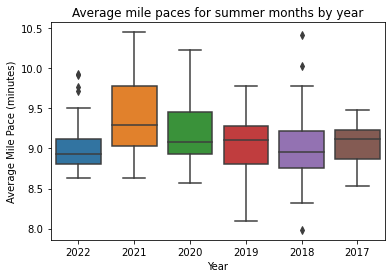

<Figure size 432x288 with 0 Axes>

In [30]:
# Side-by-side boxplot of ANOVA data
sns.boxplot(x = activities_summer.year, y = activities_summer.avg_pace_int)
plt.title('Average mile paces for summer months by year')
plt.xlabel('Year')
plt.ylabel('Average Mile Pace (minutes)')
plt.show()
plt.clf()

### Conclusion:
Based on these analyses, my average mile pace is not significantly different since March 20, 2022 than it was previously.

## Goal 2: Predict average mile pace based on distance and weather conditions